# Explore here

## Load the dataset

In [6]:
import pickle
import random
import warnings
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv' ,  sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [9]:
## Checking null values

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
## check for duplicates

data.duplicated().sum()

np.int64(12)

In [13]:
## drop the duplicates

data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

np.int64(0)

## 2.2. Feature encoding

In [15]:
# Categorical features with 'object' datatypes (string) which need encoding
data_categorical = ['y','job','education','marital','default','housing','loan','contact','poutcome','day_of_week','month']
le = LabelEncoder()
for col in data_categorical:
    data[col] = le.fit_transform(data[col])


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## Model building


In [17]:
y = data['y']
X = data.drop(columns = ['y'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
## Make predication on testing data

y_pred = lr.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)

In [23]:
print(acc)
print('---')
print(cf)

0.9032297231665857
---
[[7072  193]
 [ 604  367]]


## Optimized logistic regression model performance

In [24]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [50, 100, 200, 400, 800]
}
]
# We initialize the grid
grid = GridSearchCV(lr, param_grid, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegression()
,param_grid,"[{'max_iter': [50, 100, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'newton-cg', ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [25]:
# Use grid search with cross-validation to find best hyperparameters
# This systematically tests all combinations to find the optimal settings
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, scoring='accuracy', cv=5)
grid.fit(data.drop(columns = ['y']), data['y'])



/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode

,estimator,LogisticRegression()
,param_grid,"[{'max_iter': [50, 100, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'newton-cg', ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [26]:
# Save the best model and parameter combination
winning_parameters = grid.best_params_
winning_model = grid.best_estimator_

print(f'Best hyperparameters: {winning_parameters}')

Best hyperparameters: {'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}


In [27]:
# Score the best model on the testing set
predictions = winning_model.predict(data.drop(columns = ['y'], axis=1))
accuracy = accuracy_score(data['y'], predictions) * 100

# Store the accuracy in the results dictionary

print(f'Testing accuracy of optimized model: {accuracy:.2f}%')

Testing accuracy of optimized model: 90.62%


Retraining The Model

In [30]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model Performance Metrics

Confusion Matrix

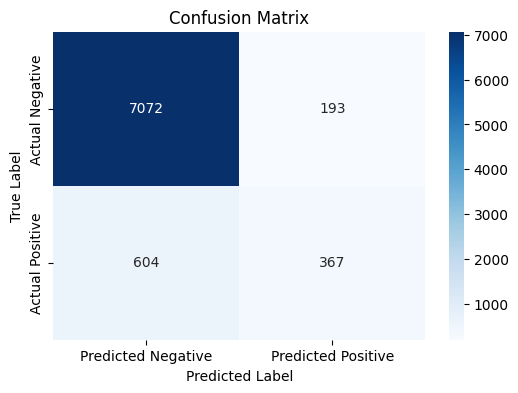

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with labels
plt.figure(figsize=(6, 4)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy:

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9032297231665857


Precision:

In [36]:
# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6553571428571429


Recall (Sensitivity):

In [37]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.3779608650875386


F1 Score:

In [38]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.47942521227955587


ROC Curve and AUC:

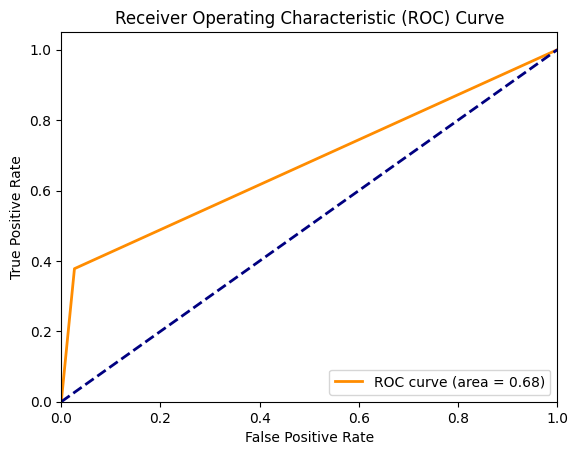

In [39]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()